### This ipynb 
#### 1) imports the dataset
#### 2) converts it to a pickle file
#### 3) performs some exploratory data analysis
#### 4) cleans, resamples, and accounts for missing data and creates the MEWS scores 
#### 5) saves the cleaned data as a pickle file

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import pickle
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from pandas import DataFrame
from datetime import datetime
from Cleaning_Creating_MEWS import*

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [3]:
data = pd.read_csv('full_dataset_anon.csv')

//anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (0,1,4,5,6,7,8,9,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
pickle_out = open('full_dataset_anon.pickle',"wb")
pickle.dump(data, pickle_out)
pickle_out.close()

In [5]:
pickle_in = open("full_dataset_anon.pickle","rb")
data = pickle.load(pickle_in)

### Renaming columns filtering the wanted data columns

In [6]:
data = data.rename(columns={'substring': 'patient_id'})
data['vital_time'] = data['vital_time'].str.split('+').str[0]
data['vital_time'] = pd.to_datetime(data['vital_time'])

unique_ids = data['patient_id'].unique()
len_unique_ids = len(data['patient_id'].unique())
print ('Number of patients in dataset = ', len_unique_ids)

vitals = data.filter(['patient_id', 'vital_time','pulse','spo2','resp', 'bpSys', 'temperature', 'gender'], axis = 1)
vitals_full_set = vitals[(vitals != 0).all(1)]

unique_ids = vitals_full_set['patient_id'].unique()
len_unique_ids = len(vitals_full_set['patient_id'].unique())
print ('Number of patients with full vitals in dataset = ', len_unique_ids)

Number of patients in dataset =  12713
Number of patients with full vitals in dataset =  2040


## Exploratory data analysis
### Plotting a random sample vitals signs of patients

Text(0.5, 1.0, "['resp']")

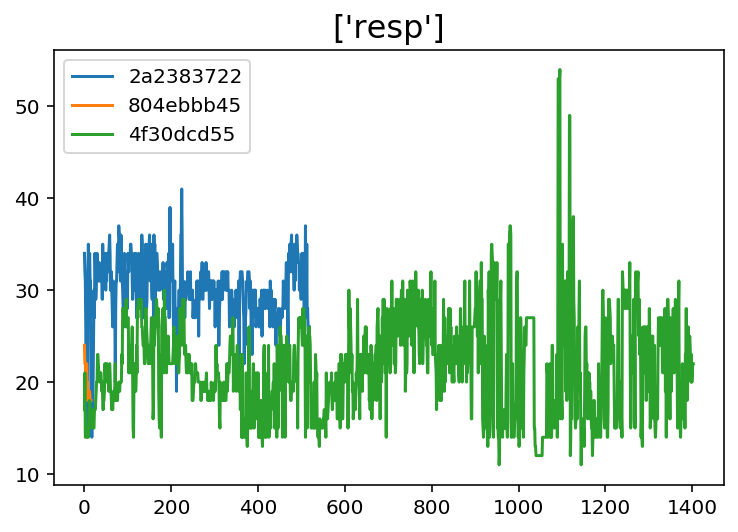

In [9]:
patients_to_show = vitals_full_set.sample(3).patient_id.values
df_sample = vitals_full_set[vitals_full_set.patient_id.isin(patients_to_show)]
fig = plt.figure()
plot_value = ['resp']
for i in df_sample['patient_id'].unique():
    this_data = vitals_full_set.loc[vitals_full_set['patient_id'] == i]
    plt.plot(np.arange(len(this_data)), this_data[plot_value[0]].values, label = i)
plt.legend()
plt.title(plot_value, fontsize = 16)

### Boxplots of vital signs

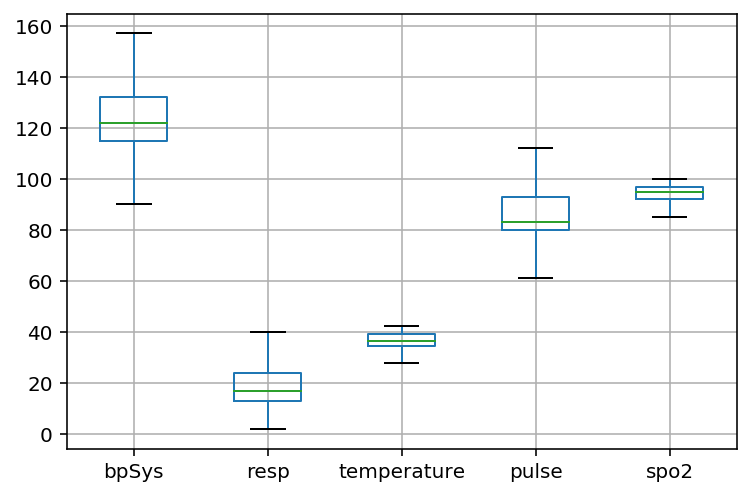

In [10]:
boxplot = vitals_full_set.boxplot(column=['bpSys', 'resp', 'temperature', 'pulse','spo2'], showfliers=False)

### Plotting boxplots of vital signs grouped by gender

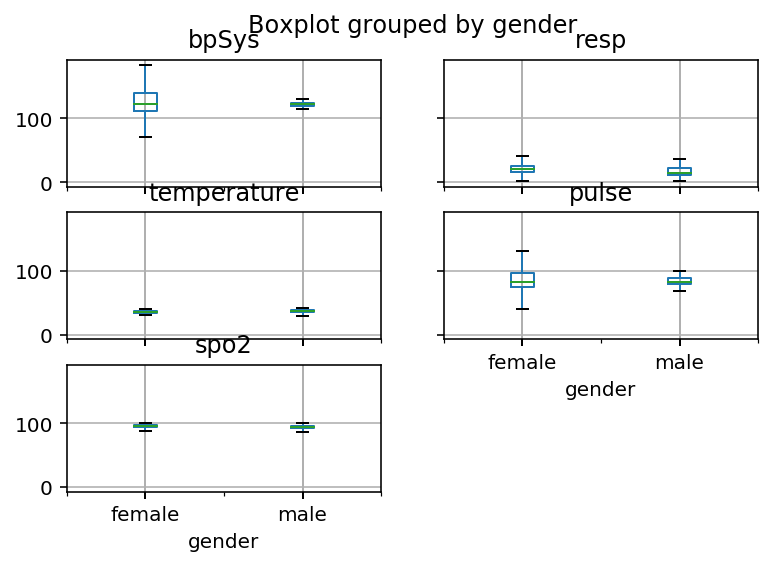

In [11]:
boxplot = vitals_full_set.boxplot(column=['bpSys', 'resp', 'temperature', 'pulse','spo2'], by='gender', showfliers=False)

### Checking if vital signs are normally distributed

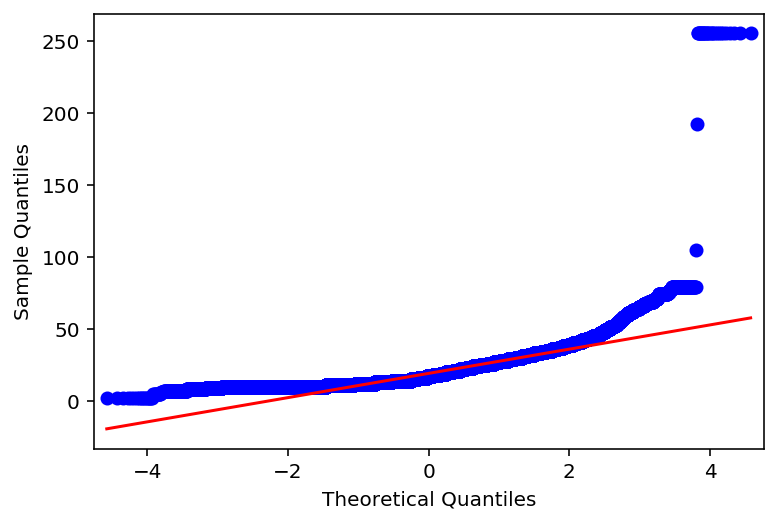

In [12]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
qqplot(vitals_full_set['resp'], line='s')
pyplot.show()

### Creating MEWS 

In [13]:
vitals_full_set = calculate_MEWS(vitals_full_set)

//anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
//anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

In [14]:
print ('Number of patients with MEWS > 7 =', len(np.unique(vitals_full_set.loc[vitals_full_set['MEWS']>=7]['patient_id'].values)))

Number of patients with MEWS > 7 = 1323


### Removing sensor error (false positive), i.e. if there is only one value of 7 or more preceded/followed by a value less than 7

In [15]:
vitals_clean = unique_chronic_patient(vitals_full_set, chronic_value)

Number of patients in dataset with sensor error removed =  2008


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.or

Text(0, 0.5, '# Patients')

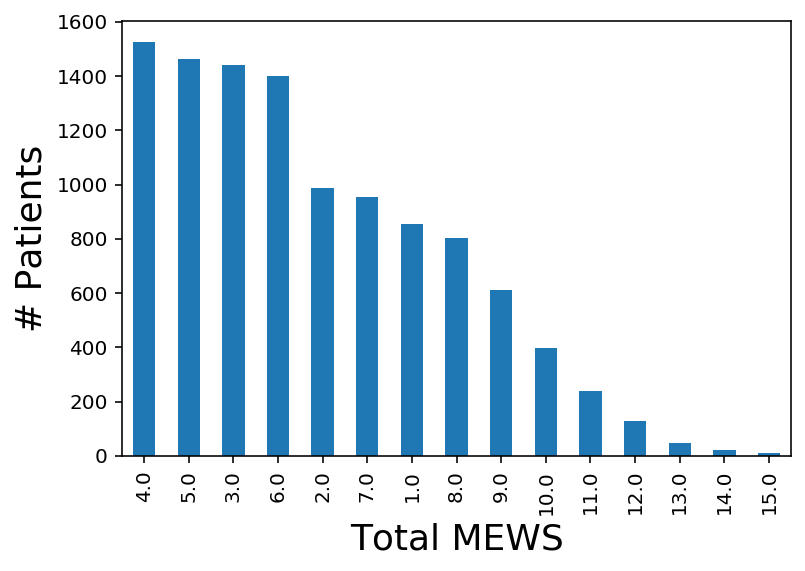

In [16]:
unique_patient_mews = vitals_full_set.drop_duplicates(subset=['patient_id', 'MEWS_clean'], keep='last')
fig = plt.figure()
unique_patient_mews.loc[(vitals_full_set['MEWS_clean'] > 0) & (vitals_full_set['MEWS_clean'] < 100)].MEWS_clean.value_counts().plot(kind = 'bar')
plt.xlabel('Total MEWS', fontsize=18)
plt.ylabel('# Patients', fontsize=18)

In [18]:
vitals_clean.to_csv('full_clean_dataset.csv')

In [17]:
save_as_pickle(vitals_clean, "full_clean_dataset.pickle")

## Feature Engineering
### Creating separate vectors for MEWS > 7 

In [19]:
vitals_above_seven = []
vitals_below_seven = []
for i in vitals_clean['patient_id'].unique():
    this_data = vitals_clean.loc[vitals_clean['patient_id'] == i]
    if this_data['MEWS_clean'].max() >= 7:
        vitals_above_seven.append(this_data)
    else:
        vitals_below_seven.append(this_data)

In [20]:
vitals_above_seven = pd.concat(vitals_above_seven)
vitals_below_seven = pd.concat(vitals_below_seven)

print ('No. of patients with MEWS >= 7 =', vitals_above_seven['patient_id'].nunique())
print ('No. of patients with MEWS < 7 =', vitals_below_seven['patient_id'].nunique())

vitals_above_seven.describe()

No. of patients with MEWS >= 7 = 1098
No. of patients with MEWS < 7 = 910


,pulse,spo2,resp,bpSys,temperature,MEWS_resp,MEWS_pulse,MEWS_spo2,MEWS_temperature,MEWS_bpSys,MEWS,next_MEWS,prev_MEWS,MEWS_clean
count,217229.000000,217229.000000,217229.000000,217229.000000,217229.000000,217229.000000,217229.000000,217229.000000,217229.000000,217229.000000,217229.000000,217228.000000,217229.000000,217229.000000
mean,95.751953,95.470039,24.067104,130.834479,35.246298,1.699138,0.721612,0.627674,1.687206,0.514963,5.250593,5.290174,5.289667,5.250593
std,530.571996,4.115550,8.227724,528.571085,52.648060,1.328563,0.815267,0.989765,1.323031,0.866497,2.483328,2.498706,2.499048,2.483328
min,9.000000,4.000000,2.000000,55.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,78.000000,95.000000,18.000000,107.000000,33.400000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,4.000000,4.000000,3.000000
50%,90.000000,96.000000,23.000000,123.000000,35.100000,2.000000,1.000000,0.000000,1.000000,0.000000,5.000000,5.000000,5.000000,5.000000
75%,103.000000,98.000000,28.000000,143.000000,36.300000,3.000000,1.000000,1.000000,3.000000,1.000000,7.000000,7.000000,7.000000,7.000000
max,65535.000000,255.000000,255.000000,65535.000000,6553.500000,3.000000,3.000000,3.000000,3.000000,3.000000,15.000000,15.000000,15.000000,15.000000


Text(0, 0.5, 'MEWS')

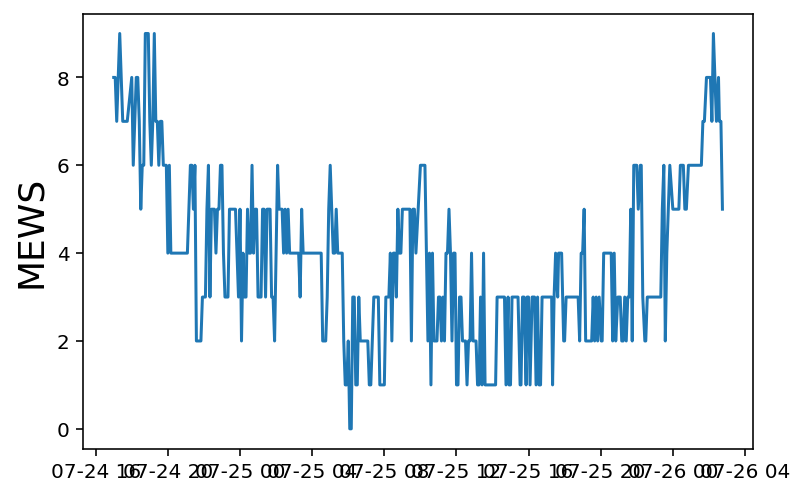

In [21]:
patients_to_show = vitals_above_seven.sample(1).patient_id.values
df_sample = vitals_above_seven[vitals_above_seven.patient_id.isin(patients_to_show)]
df_sample.index = pd.to_datetime(df_sample['vital_time'].values)

fig = plt.figure()
plt.plot(df_sample['vital_time'], df_sample['MEWS_clean'])
plt.ylabel('MEWS', fontsize = 18)

In [22]:
save_as_pickle(vitals_clean, "vitals_above_seven.pickle")
save_as_pickle(vitals_clean, "vitals_below_seven.pickle")